# 1. Introduction

Name: Celine Clarissa

Original Dataset: [Kaggle](https://www.kaggle.com/datasets/anthonytherrien/futureflow-navigating-tomorrows-urban-traffic/data)

Data Visualization: [Tableau Dashboard](https://public.tableau.com/app/profile/celine.clarissa7989/viz/Milestone1_17176929954950/Dashboard1?publish=yes)

GitHub: [GitHub Link](https://github.com/celineclarissa/Traffic-Data-Analysis)

## Identifying the Problem
### `Background`

I am a data analyst at a fuel company in a futuristic urban setting where fuel is used to provide energy for transportation needs. As a data analyst at a fuel company, it is crucial to understand the market and gain insights from it to build strategies for the company. The data used is traffic data set in six diverse cities gained from the Department of Transportation's public data and is saved in a csv file format.

### `Topic`

From analyzing traffic data, consumer behavior and variables for use of energy in six cities can be obtained. 

### `Problem Statement (SMART Framework)`

As a data analyst at a fuel company, skills of understanding the market and extracting business insights from data are needed. By examining traffic data, it is possible to do that. Data analysts have to get to know about the correlation between variables in analyzed data, and use data to find out about consumer behavior can then be analyzed. By gaining information from data, it is targeted for the company to increase energy consumption, and therefore, fuel consumption. The insights are aimed to be displayed in the form of an interactive dashboard after 5 working days.

### `5W+1H Method`

1. How is the vehicle type distribution in each city? 
2. When is energy most consumed? (What day of week? What hour of day?)
3. What vehicle type uses up the most energy?
4. What is the average speed of vehicles in each city?
5. Are the traffic density in six cities significantly different?
6. is Energy Consumption related to City, Speed, Vehicle Type, and Traffic Density?
7. How is Is Peak Hour related to Hour of Day, Energy Consumption, and Traffic Density?

# 2. Import Libraries

The following are the libraries that are used in the my data analysis process.

In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 3. Data Loading

In [3]:
# load data
traffic_ori = pd.read_csv("C:/Users/User/hacktiv8/Phase 0/Milestone/futuristic_city_traffic.csv")
traffic_ori

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544
...,...,...,...,...,...,...,...,...,...,...,...
1219562,SolarisVille,Autonomous Vehicle,Electromagnetic Storm,Booming,Wednesday,13,75.7534,0,0,60.6027,0.3840
1219563,MetropolisX,Drone,Snowy,Booming,Saturday,1,24.7660,0,0,14.8122,0.5526
1219564,Neuroburg,Autonomous Vehicle,Snowy,Booming,Monday,19,75.6292,0,0,61.8568,0.0564
1219565,MetropolisX,Autonomous Vehicle,Clear,Booming,Monday,1,52.7983,0,0,85.7116,0.5079


In [4]:
# make copy of original file and sampling 10,000 data out of 1,219,567
traffic = traffic_ori.copy().sample(10000)

In [5]:
# retrieve info about dataframe
traffic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1165140 to 161296
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   10000 non-null  object 
 1   Vehicle Type           10000 non-null  object 
 2   Weather                10000 non-null  object 
 3   Economic Condition     10000 non-null  object 
 4   Day Of Week            10000 non-null  object 
 5   Hour Of Day            10000 non-null  int64  
 6   Speed                  10000 non-null  float64
 7   Is Peak Hour           10000 non-null  int64  
 8   Random Event Occurred  10000 non-null  int64  
 9   Energy Consumption     10000 non-null  float64
 10  Traffic Density        10000 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 937.5+ KB


There are 10,000 rows and 11 columns in table. There are no missing values. All columns have the appropriate data type.

In [6]:
# see statistical summary of all numerical columns
traffic.describe()

,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.583700,59.753682,0.153900,0.049300,49.419685,0.277555
std,6.954713,26.595873,0.360871,0.216504,25.140125,0.217732
min,0.000000,9.604400,0.000000,0.000000,7.158900,0.007600
25%,6.000000,37.572650,0.000000,0.000000,29.318425,0.106075
50%,12.000000,58.289550,0.000000,0.000000,45.748200,0.222650
75%,18.000000,80.187850,0.000000,0.000000,65.900625,0.396100
max,23.000000,144.000000,1.000000,1.000000,165.057900,2.260700


In [7]:
# check which columns contain categorical data
traffic.nunique()

City                        6
Vehicle Type                4
Weather                     5
Economic Condition          3
Day Of Week                 7
Hour Of Day                24
Speed                    9500
Is Peak Hour                2
Random Event Occurred       2
Energy Consumption       9927
Traffic Density          5075
dtype: int64

Columns "City", "Vehicle Type", "Weather", "Economic Condition", "Day Of Week", "Hour Of Day", "Is Peak Hour", and "Random Event Occurred" contains categorical data. Meanwhile columns "Speed", "Energy Consumption", and "Traffic Density" has value that are not categories.

In [8]:
# check whether there is Missing Value
traffic.isnull().sum().sum()

0

Data has no missing values.

In [9]:
# check whether there is duplicated data
traffic.duplicated().sum()

0

Data has no duplicated rows.

In [10]:
# view unique values
# columns with data type 'object'
columns_obj = traffic.select_dtypes(include=['object']).columns
for column in columns_obj:
    print(f"\nColumn: {column}")
    print(traffic[column].unique())

print("")
# columns with number of unique values = 2
# column "Is Peak Hour"
unique_IsPeakHour = list(traffic['Is Peak Hour'].unique())
print("Column: Is Peak Hour")
print(unique_IsPeakHour)
print("")

# column "Random Event Occurred"
unique_RandomEvent = list(traffic['Random Event Occurred'].unique())
print("Column: Random Event Occurred")
print(unique_RandomEvent)


Column: City
['SolarisVille' 'Ecoopolis' 'AquaCity' 'TechHaven' 'MetropolisX'
 'Neuroburg']

Column: Vehicle Type
['Flying Car' 'Autonomous Vehicle' 'Drone' 'Car']

Column: Weather
['Clear' 'Snowy' 'Solar Flare' 'Rainy' 'Electromagnetic Storm']

Column: Economic Condition
['Booming' 'Stable' 'Recession']

Column: Day Of Week
['Thursday' 'Sunday' 'Saturday' 'Wednesday' 'Friday' 'Tuesday' 'Monday']

Column: Is Peak Hour
[0, 1]

Column: Random Event Occurred
[0, 1]


`Column Description`
| Column Name | Short Description | Unique Values | Data Type |
| :-----------------------: | :-----------------------------: | :--------------: | :------------: |
| City | Name of city where data was recorded | SolarisVille, AquaCity, Neuroburg, Ecoopolis, TechHaven, MetropolisX (6) | object |
| Vehicle Type | Type of vehicle being used | Drone, Flying Car, Autonomous Vehicle, Car (4) | object |
| Weather | Weather when data was recorded | Snowy, Solar Flare, Clear, Rainy, Electromagnetic Storm (5) | object |
| Economic Condition | Economic state of city when data was recorded | Stable, Recession, Booming (3) | object |
| Day of Week | Day of week when data was recorded | Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday | object |
| Hour of Day | Hour of day when data was recorded | 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24| int |
| Speed | Vehicle speed | | float |
| Energy Consumption | Estimated energy consumption based on vehicle type and speed | | int |
| Is Peak Hour | Whether it time of data recording was in peak hour | 0, 1 | int |
| Random Event Occurred | Whether a random event such as accidents or road closures happened | 0, 1 | float |
| Traffic Density | Density of traffic when data was recorded | | float |

*Description of columns were taken and rephrased from [data source](https://www.kaggle.com/datasets/anthonytherrien/futureflow-navigating-tomorrows-urban-traffic/data)

`Insights`
- Table consists of 1219567 rows and 11 columns.
- There are no rows that contain missing values.
- There are no duplicated datas.
- All columns have suitable data type for each column's value.
- Columns "City", "Vehicle Type", "Weather", "Economic Condition", "Day Of Week", and "Hour Of Day" contain categorical data.
- Columns "Speed", "Energy Consumption", and "Traffic Density" contain numerical data.
- Columns "Is Peak Hour" and "Random Event Occurred" are truly contain "True" or "False", but are displayed in the form of numbers "1" which indicated "True" and "0" which indicates "False".
- "Peak Hour" is not defined as a specific range of time.

# 4. Data Cleaning

In [11]:
# rename column headers
traffic = traffic.rename(columns={'Vehicle Type':'Vehicle_Type',
                                  'Economic Condition': 'Economic_Condition',
                                  'Day Of Week':'Day_of_Week',
                                  'Hour Of Day':'Hour_of_Day',
                                  'Is Peak Hour':'Is_Peak_Hour',
                                  'Random Event Occurred':'Random_Event_Occurred',
                                  'Energy Consumption':'Energy_Consumption',
                                  'Traffic Density':'Traffic_Density'})

## 4.1. Analyze Column "Speed"

In [12]:
# calculate average
print('Average:', traffic['Speed'].mean())

# find median
print('Median:', traffic['Speed'].median())

# calculate skewness
print('Skewness:', traffic['Speed'].skew())

# calculate kurtosis
print('Kurtosis:', traffic['Speed'].kurtosis())

Average: 59.75368206999999
Median: 58.28955
Skewness: 0.25677199293509645
Kurtosis: -0.8197424316228199


- Column "Speed" has skewness value between range of -0.5 and 0.5, so it is considered to be an approximately symmetric distribution.
- Column "Speed has kurtosis value of less than 0, so it is categorized as platycurtic (has lighter tails and flat peak). This indicates that column "Speed" has fewer outliers than a normal distribution would.
- After checking the average and median value, it can be understood that column "Speed" is a normal distribution because it has toleratable gap (less than 2), whereas normal distributions should have little to no gap between average and median values.

From these calculations, it can be concluded that the data from column "Speed" is a normal distribution. Therefore, its outliers and extreme values can be analyzed using the Z-Score method.

<Axes: >

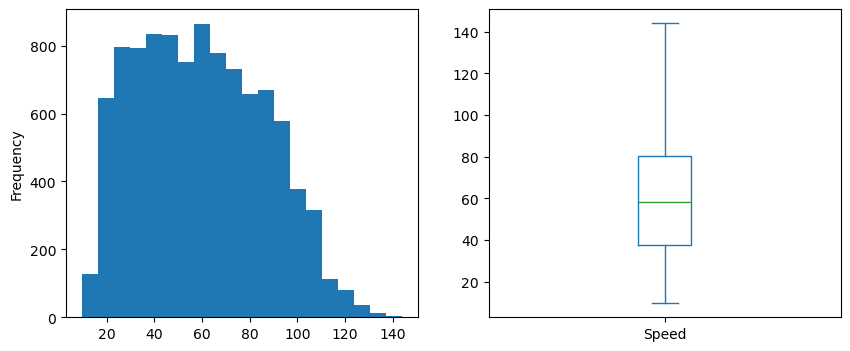

In [13]:
# visualize data
fig, ax = plt.subplots(ncols=2,figsize=(10,4))
traffic['Speed'].plot(kind='hist',bins=20,ax=ax[0])
traffic['Speed'].plot(kind='box',ax=ax[1])

In [14]:
# calculate average
avg = traffic['Speed'].mean()

# calculate standard deviation
std = traffic['Speed'].std()

# calculate upper and lower boundaries
up_bound = avg + 3*std
low_bound = avg - 3*std

# define outliers
outlier = traffic['Speed'][(traffic['Speed']<low_bound) | (traffic['Speed']>up_bound)]

# calculate percentage of outliers
print(f'Percentage of outliers: {len(outlier)*100/len(traffic["Speed"]):.2f}%%')

Percentage of outliers: 0.01%%


Percentage of outliers is less than 5%. So, outliers have to be trimmed.

In [15]:
# trim outliers
traffic = traffic[(traffic['Speed']>=low_bound) & (traffic['Speed']<=up_bound)]

<Axes: >

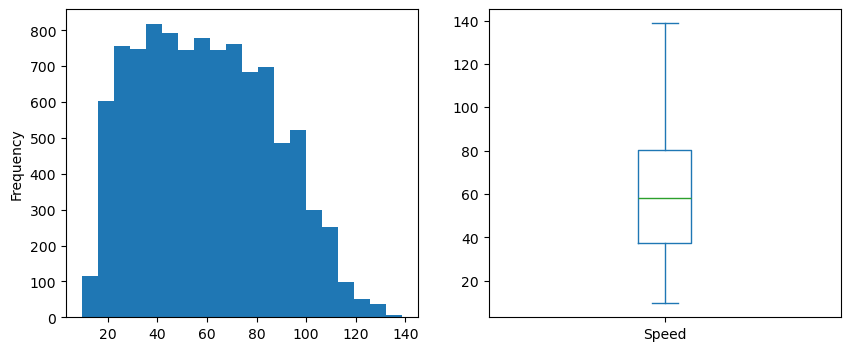

In [16]:
# visualize data
fig, ax = plt.subplots(ncols=2,figsize=(10,4))
traffic['Speed'].plot(kind='hist',bins=20,ax=ax[0])
traffic['Speed'].plot(kind='box',ax=ax[1])

Outliers has been trimmed.

## 4.2. Analyze Column "Energy_Consumption"

In [17]:
# calculate average
print('Average:', traffic['Energy_Consumption'].mean())

# find median
print('Median:', traffic['Energy_Consumption'].median())

# calculate skewness
print('Skewness:', traffic['Energy_Consumption'].skew())

# calculate kurtosis
print('Kurtosis:', traffic['Energy_Consumption'].kurtosis())

Average: 49.411999759976
Median: 45.7415
Skewness: 0.6713559895116623
Kurtosis: 0.028163486477826183


- Column "Energy_Consumption" has skewness value between range of 0.5 and 1, so it is considered to be moderately skewed.
- Column "Energy_Consumption has kurtosis value of more than 0, so it is categorized as leptocurtic (has heavy tails and high peak). This indicates that column "Energy_Consumption" has more outliers than a normal distribution would.
- After checking the average and median value, it can be understood that column "Energy_Consumption" is a normal distribution because it has toleratable gap (less than 4), whereas normal distributions should have little to no gap between average and median values.

From these calculations, it can be concluded that the data from column "Energy_Consumption" is a normal distribution, although it is a little skewed. Therefore, its outliers and extreme values can be analyzed using the Z-Score method.

<Axes: >

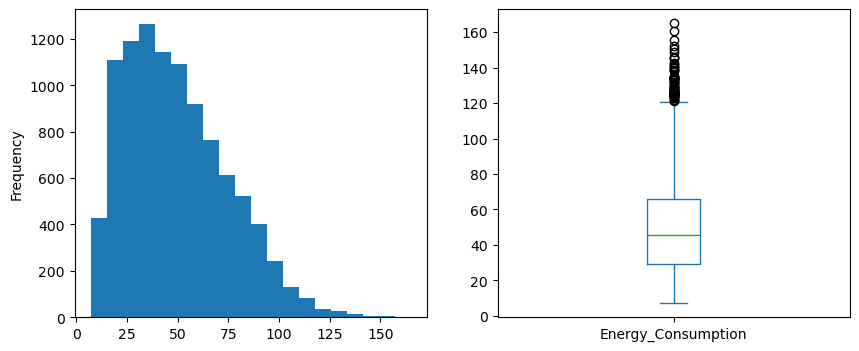

In [18]:
# visualize data
fig, ax = plt.subplots(ncols=2,figsize=(10,4))
traffic['Energy_Consumption'].plot(kind='hist',bins=20,ax=ax[0])
traffic['Energy_Consumption'].plot(kind='box',ax=ax[1])

In [19]:
# calculate average
avg = traffic['Energy_Consumption'].mean()

# calculate standard deviation
std = traffic['Energy_Consumption'].std()

# calculate upper and lower boundaries
up_bound = avg + 3*std
low_bound = avg - 3*std

# define outliers
outlier = traffic['Energy_Consumption'][(traffic['Energy_Consumption']<low_bound) | (traffic['Energy_Consumption']>up_bound)]

# calculate percentage of outliers
print(f'Percentage of outliers: {len(outlier)*100/len(traffic["Energy_Consumption"]):.2f}%%')

Percentage of outliers: 0.55%%


Percentage of outliers is less than 5%. So, outliers have to be trimmed.

In [20]:
# trim outliers
traffic = traffic[(traffic['Energy_Consumption']>=low_bound) & (traffic['Energy_Consumption']<=up_bound)]

<Axes: >

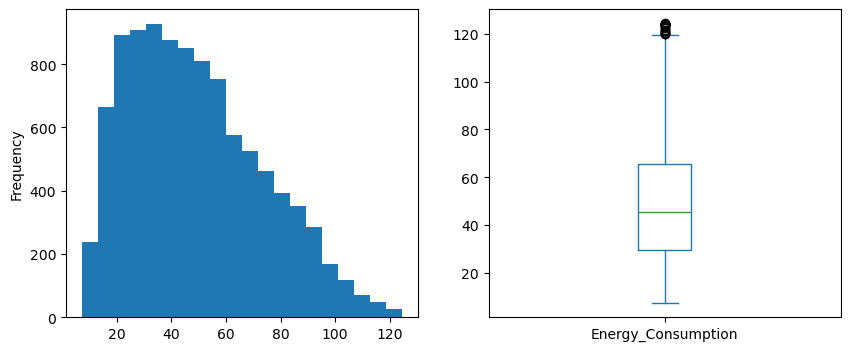

In [21]:
# visualize data
fig, ax = plt.subplots(ncols=2,figsize=(10,4))
traffic['Energy_Consumption'].plot(kind='hist',bins=20,ax=ax[0])
traffic['Energy_Consumption'].plot(kind='box',ax=ax[1])

From the box plot it can be seen that there are still some outliers. However, the amount has been reduced.

## 4.3. Analyze Column "Traffic_Density"

In [22]:
# calculate average
print('Average:', traffic['Traffic_Density'].mean())

# find median
print('Median:', traffic['Traffic_Density'].median())

# calculate skewness
print('Skewness:', traffic['Traffic_Density'].skew())

# calculate kurtosis
print('Kurtosis:', traffic['Traffic_Density'].kurtosis())

Average: 0.2768878620273532
Median: 0.2222
Skewness: 1.4266146940618052
Kurtosis: 3.3565057085915697


- Column "Traffic_Density" has skewness value of more than 1, so it is considered to be highly skewed.
- Column "Traffic_Density has kurtosis value of more than 0, so it is categorized as leptocurtic (has heavy tails and high peak). This indicates that column "Traffic_Density" has more outliers than a normal distribution would.
- After checking the average and median value, it can be understood that column "Traffic_Density" is not a normal distribution because it has intoleratable gap, whereas normal distributions should have little to no gap between average and median values.

From these calculations, it can be concluded that the data from column "Traffic_Density" is not a normal distribution. Therefore, its outliers and extreme values can be analyzed using the Tukey's Rule method.

<Axes: >

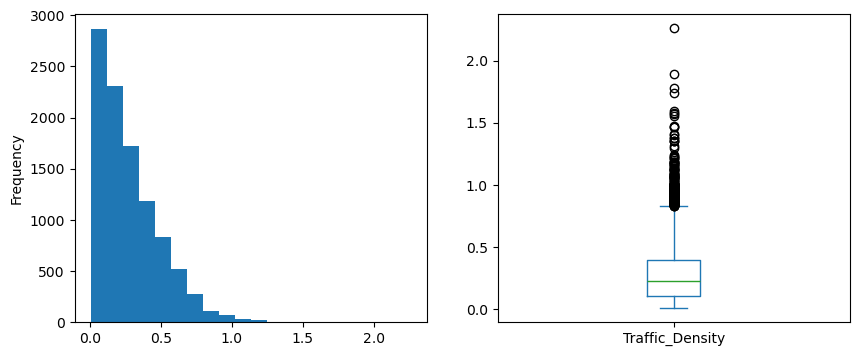

In [23]:
# visualize data
fig, ax = plt.subplots(ncols=2,figsize=(10,4))
traffic['Traffic_Density'].plot(kind='hist',bins=20,ax=ax[0])
traffic['Traffic_Density'].plot(kind='box',ax=ax[1])

In [24]:
# define lower quartile, upper quartile, and inter quartile range
q1 = traffic['Traffic_Density'].quantile(0.25)
q3 = traffic['Traffic_Density'].quantile(0.75)
iqr = q3-q1

# define upper and lower boundaries
up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

# define outliers
outlier = traffic['Traffic_Density'][(traffic['Traffic_Density']<low_bound) | (traffic['Traffic_Density']>up_bound)]

# calculate percentage of outliers
print(f'Percentage of outliers: {len(outlier)*100/len(traffic["Traffic_Density"]):.2f}%%')

Percentage of outliers: 2.07%%


Percentage of outliers is less than 5%. So, outliers have to be trimmed.

In [25]:
# trim outliers
traffic = traffic[(traffic['Traffic_Density']>=low_bound) & (traffic['Traffic_Density']<=up_bound)]

<Axes: >

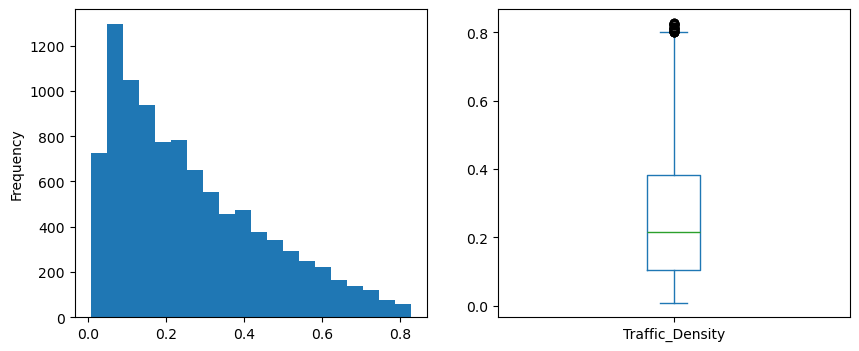

In [26]:
# visualize data
fig, ax = plt.subplots(ncols=2,figsize=(10,4))
traffic['Traffic_Density'].plot(kind='hist',bins=20,ax=ax[0])
traffic['Traffic_Density'].plot(kind='box',ax=ax[1])

From the box plot it can be seen that there are still some outliers. However, the amount has been reduced.

### Save Data as CSV File

In [27]:
traffic.reset_index(drop=True).to_csv("traffic.csv", sep=',')

# 5. Analysis and Statistical Calculations

## 5.1. See distribution of vehicle types used in each city

### 5.1.A. SolarisVille

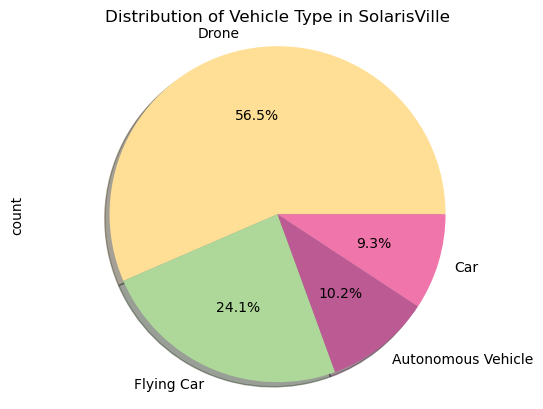

In [28]:
# make query for columns 'City' and 'Vehicle_Type' for SolarisVille
solarisville_vehicle = traffic.loc[traffic['City']=='SolarisVille', ['City', 'Vehicle_Type']]

# count value for each vehicle type
solarisville_counts = solarisville_vehicle['Vehicle_Type'].value_counts(dropna=False)

# create pie chart
color= ['#FFDE95', '#ADD899', '#BC5A94', '#F075AA', '#3AA6B9', '#FA7070']
solarisville_counts.plot.pie(labels=['Drone', 'Flying Car', 'Autonomous Vehicle', 'Car'], colors=color, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Vehicle Type in SolarisVille')
plt.axis('equal')
plt.show()

### 5.1.B. AquaCity

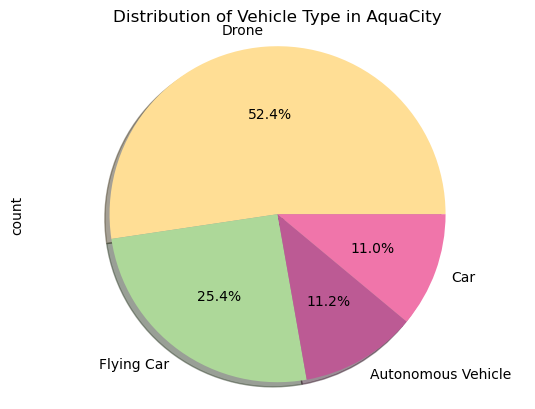

In [29]:
# make query for columns 'City' and 'Vehicle_Type' for AquaCity
aquacity_vehicle = traffic.loc[traffic['City']=='AquaCity', ['City', 'Vehicle_Type']]

# count value for each vehicle type
aquacity_counts = aquacity_vehicle['Vehicle_Type'].value_counts(dropna=False)

# create pie chart
aquacity_counts.plot.pie(labels=['Drone', 'Flying Car', 'Autonomous Vehicle', 'Car'], colors=color, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Vehicle Type in AquaCity')
plt.axis('equal')
plt.show()

### 5.1.C. Neuroburg

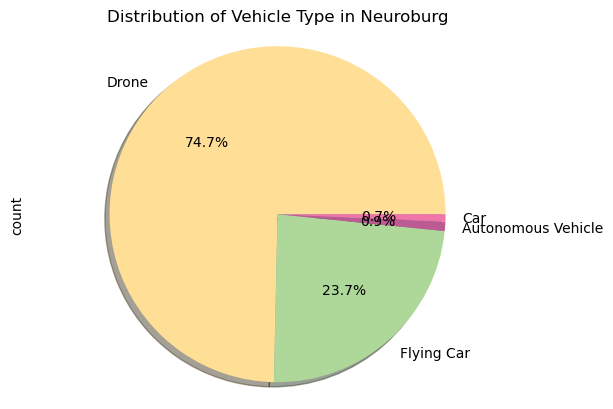

In [30]:
# make query for columns 'City' and 'Vehicle_Type' for Neuroburg
neuroburg_vehicle = traffic.loc[traffic['City']=='Neuroburg', ['City', 'Vehicle_Type']]

# count value for each vehicle type
neuroburg_counts = neuroburg_vehicle['Vehicle_Type'].value_counts(dropna=False)

# create pie chart
neuroburg_counts.plot.pie(labels=['Drone', 'Flying Car', 'Autonomous Vehicle', 'Car'], colors=color, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Vehicle Type in Neuroburg')
plt.axis('equal')
plt.show()

### 5.1.D. Ecoopolis

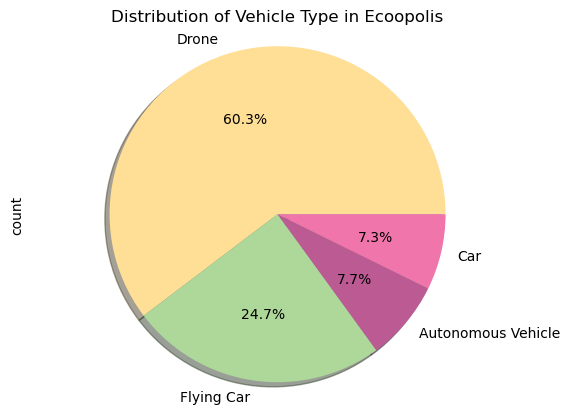

In [31]:
# make query for columns 'City' and 'Vehicle_Type' for Ecoopolis
ecoopolis_vehicle = traffic.loc[traffic['City']=='Ecoopolis', ['City', 'Vehicle_Type']]

# count value for each vehicle type
ecoopolis_counts = ecoopolis_vehicle['Vehicle_Type'].value_counts(dropna=False)

# create pie chart
ecoopolis_counts.plot.pie(labels=['Drone', 'Flying Car', 'Autonomous Vehicle', 'Car'], colors=color, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Vehicle Type in Ecoopolis')
plt.axis('equal')
plt.show()

### 5.1.E. TechHaven

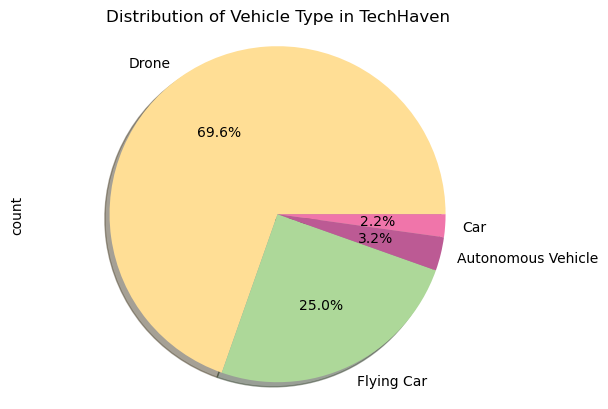

In [32]:
# make query for columns 'City' and 'Vehicle_Type' for TechHaven
techhaven_vehicle = traffic.loc[traffic['City']=='TechHaven', ['City', 'Vehicle_Type']]

# count value for each vehicle type
techhaven_counts = techhaven_vehicle['Vehicle_Type'].value_counts(dropna=False)

# create pie chart
techhaven_counts.plot.pie(labels=['Drone', 'Flying Car', 'Autonomous Vehicle', 'Car'], colors=color, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Vehicle Type in TechHaven')
plt.axis('equal')
plt.show()

### 5.1.F. MetropolisX

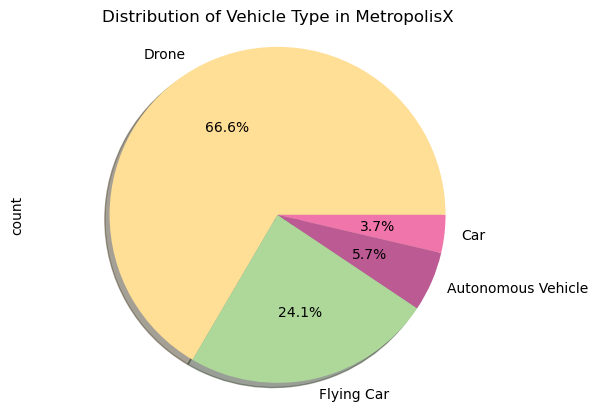

In [33]:
# make query for columns 'City' and 'Vehicle_Type' for MetropolisX
metropolisx_vehicle = traffic.loc[traffic['City']=='MetropolisX', ['City', 'Vehicle_Type']]

# count value for each vehicle type
metropolisx_counts = metropolisx_vehicle['Vehicle_Type'].value_counts(dropna=False)

# create pie chart
metropolisx_counts.plot.pie(labels=['Drone', 'Flying Car', 'Autonomous Vehicle', 'Car'], colors=color, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Vehicle Type in MetropolisX')
plt.axis('equal')
plt.show()

## 5.2. See When is Energy Most Consumed

### 5.2.A. What Day of Week

In [34]:
# make query dan define data_day_energy
data_day_energy = traffic.loc[traffic.Day_of_Week != '0', ['Day_of_Week', 'Energy_Consumption']].groupby('Day_of_Week').mean().sort_values('Energy_Consumption').reset_index()

# define result
result_day_energy = data_day_energy[data_day_energy['Energy_Consumption'] == data_day_energy['Energy_Consumption'].max()]['Day_of_Week']
result_day_energy

6    Friday
Name: Day_of_Week, dtype: object

<Axes: ylabel='Day_of_Week'>

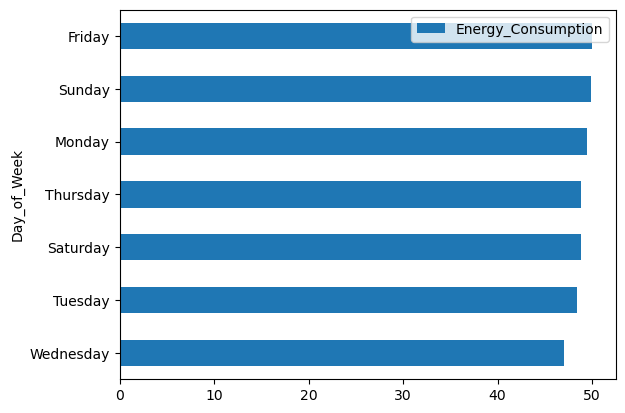

In [35]:
# visualize data
data_day_energy.plot(kind='barh', x='Day_of_Week', y='Energy_Consumption')

**Conclusion:**

Among the seven days of the week, energy is most consumed on Fridays.

### 5.2.B. What hour of day

In [36]:
# make query dan define data_hour_energy
data_hour_energy = traffic.loc[traffic.Hour_of_Day > 0, ['Hour_of_Day', 'Energy_Consumption']].groupby('Hour_of_Day').mean().sort_values('Energy_Consumption').reset_index()

# define result
result_hour_energy = data_hour_energy[data_hour_energy['Energy_Consumption'] == data_hour_energy['Energy_Consumption'].max()]['Hour_of_Day']
result_hour_energy

22    16
Name: Hour_of_Day, dtype: int64

<Axes: xlabel='Hour of Day', ylabel='Energy Consumption'>

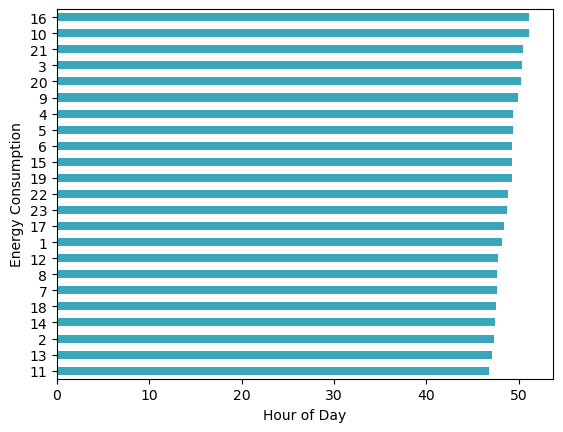

In [37]:
# visualize data
data_hour_energy.plot(kind='barh', x='Hour_of_Day', y='Energy_Consumption', xlabel='Hour of Day', ylabel='Energy Consumption', color=color[4], legend=False)

**Conclusion:**

Among the twenty four hours in a day, energy is most consumed at 16.00 (4 PM).

## 5.3. See Which Vehicle Type Uses Up the Most Energy

In [38]:
# make query dan define data_vehicle_energy
data_vehicle_energy = traffic.loc[traffic.Vehicle_Type != '0', ['Vehicle_Type', 'Energy_Consumption']].groupby('Vehicle_Type').mean().sort_values('Energy_Consumption').reset_index()

# define result
result_vehicle_energy = data_vehicle_energy[data_vehicle_energy['Energy_Consumption'] == data_vehicle_energy['Energy_Consumption'].max()]['Vehicle_Type']
result_vehicle_energy

3    Flying Car
Name: Vehicle_Type, dtype: object

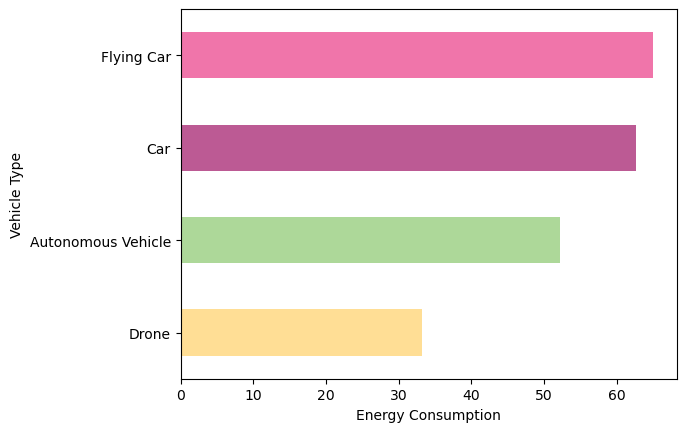

In [39]:
# visualize data
graph_vehicle_energy = data_vehicle_energy.plot(kind='barh', x='Vehicle_Type', y='Energy_Consumption', xlabel='Energy Consumption', ylabel='Vehicle Type', color=color, legend=False)

**Conclusion:**

Among the four vehicle types, flying cars use up the most energy.

## 5.4. See Average Speed in Each City

In [40]:
# make query dan define data_avgspeed_city
data_avgspeed_city = traffic.loc[traffic.City != '0', ['Speed', 'City']].groupby('City').mean().sort_values('Speed', ascending=False).reset_index()
data_avgspeed_city

,City,Speed
0,SolarisVille,64.680370
1,MetropolisX,62.340154
2,Neuroburg,60.995434
3,Ecoopolis,57.308821
4,AquaCity,57.270587
5,TechHaven,55.100442


<Axes: xlabel='City', ylabel='Average Speed'>

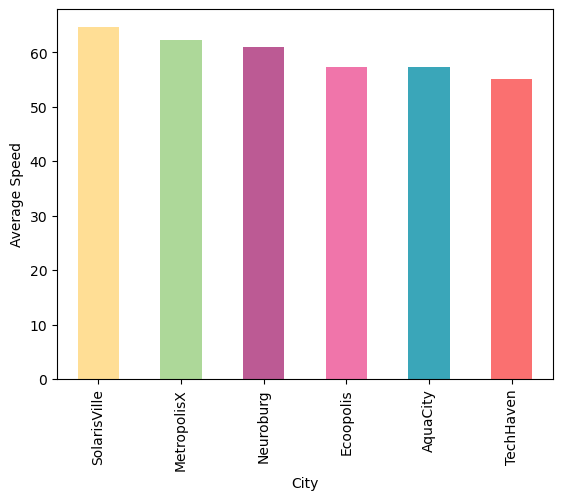

In [41]:
# visualize data
data_avgspeed_city.plot(kind='bar', x='City', y='Speed', ylabel='Average Speed', color=color, legend=False)

## 5.5. Analyze Difference of Traffic Density among Six Cities
Using ANOVA technique (Inferential Statistics) to compare Traffic Density in six cities.

In [42]:
# define traffic density for each city
solarisville_density = traffic['Traffic_Density'][traffic['City']=='SolarisVille']
aquacity_density = traffic['Traffic_Density'][traffic['City']=='AquaCity']
neuroburg_density = traffic['Traffic_Density'][traffic['City']=='Neuroburg']
ecoopolis_density = traffic['Traffic_Density'][traffic['City']=='Ecoopolis']
techhaven_density = traffic['Traffic_Density'][traffic['City']=='TechHaven']
metropolisx_density = traffic['Traffic_Density'][traffic['City']=='MetropolisX']

H0: There isn't any significant difference in Traffic Density among six cities *(null hypothesis)*

H1: There is significant difference in Traffic Density among six cities *(alternate hypothesis)*

In [43]:
res = stats.f_oneway(solarisville_density, aquacity_density, neuroburg_density, ecoopolis_density, techhaven_density, metropolisx_density)
print('P-value:',res.pvalue)

P-value: 0.0


Because the confidence level used is 95%, the critical value is 0.05.

0.0 < 0.05

p-value < critical value

**Conclusion:**

H0 is rejected. So, it can be understood that H0 is rejected, which means that the Traffic Density in six cities are significantly different. To see the difference, the graph below is displayed.

In [44]:
# make query dan define data_density_city
data_density_city = traffic.loc[traffic.City != '0', ['City', 'Traffic_Density']].groupby('City').mean().sort_values('Traffic_Density', ascending=False).reset_index()

# see table
data_density_city

,City,Traffic_Density
0,AquaCity,0.422702
1,MetropolisX,0.406581
2,SolarisVille,0.293596
3,TechHaven,0.202059
4,Ecoopolis,0.192564
5,Neuroburg,0.073862


<Axes: xlabel='City', ylabel='Traffic Density'>

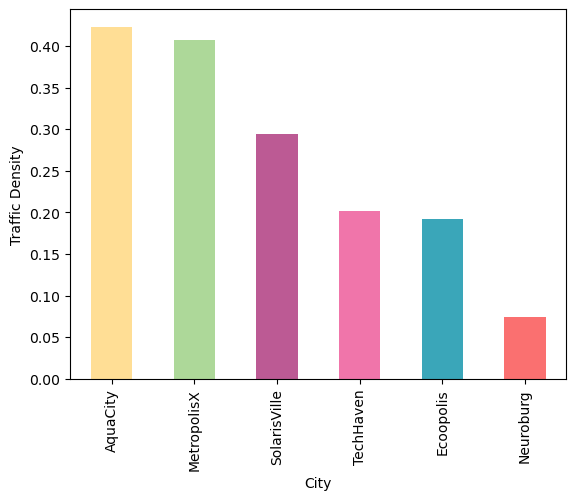

In [45]:
# visualize data
data_density_city.plot(kind='bar', x='City', y='Traffic_Density', ylabel='Traffic Density', color=color, legend=False)

It can be seen that AquaCity has the highest Traffic Density amongst all six cities.

## 5.6. Analyze Correlation Between Energy Consumption with Speed, Vehicle Type, and Traffic Density

### 5.6.A. City
Using ANOVA method (Inferential Statistics) to calculate correlation between Energy Consumption (numerical) and City (categorical).

In [46]:
# define energy consumption data for each city
solarisville = traffic['Energy_Consumption'][(traffic['City']=='SolarisVille')]
aquacity = traffic['Energy_Consumption'][traffic['City']=='AquaCity']
neuroburg = traffic['Energy_Consumption'][traffic['City']=='Neuroburg']
ecoopolis = traffic['Energy_Consumption'][traffic['City']=='Ecoopolis']
techhaven = traffic['Energy_Consumption'][traffic['City']=='TechHaven']
metropolisx = traffic['Energy_Consumption'][traffic['City']=='MetropolisX']

Define hypotheses

H0: There no significant difference of Energy Consumption among six cities

H1: There are significant difference of Energy Consumption among six cities

In [47]:
# calculate correlation
res = stats.f_oneway(solarisville, aquacity, neuroburg, ecoopolis, techhaven, metropolisx)
print('P-value:',res.pvalue)

P-value: 1.189891007698887e-34


Because the confidence level used is 95%, the critical value is 0.05.

p-value < critical value

**Conclusion:**

H0 is rejected. So, it can be understood that the Energy Consumption among six cities are significantly different. To see the difference, the graph below is displayed.

<Axes: xlabel='City', ylabel='Energy Consumption'>

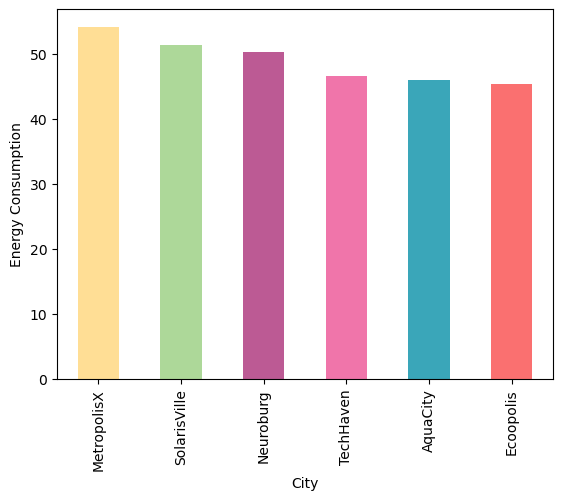

In [48]:
# make query dan define data_energy_vehicle
data_energy_city = traffic.loc[traffic.City != '0', ['City', 'Energy_Consumption']].groupby('City').mean().sort_values('Energy_Consumption', ascending=False).reset_index()

# visualize data
data_energy_city.plot(kind='bar', x='City', y='Energy_Consumption', ylabel='Energy Consumption', color=color, legend=False)

**Conclusion:**

From the graph, it can be understood that vehicles in MetropolisX use up the most energy, followed by SolarisVille, Neuroburg, TechHaven, Ecoopolis, and AquaCity.

### 5.6.B. Speed
Using Pearson's method (Descriptive Statistics) to calculate correlation between Energy Consumption (numerical, normal) and Speed (numerical, normal).

r-correlation: 0.85, p-value: 0.0


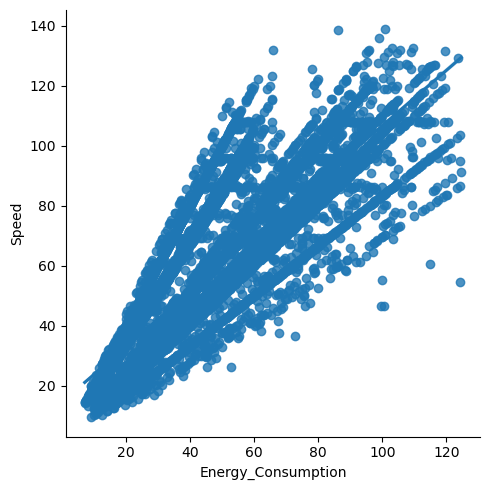

In [49]:
# visualize data
sns.lmplot(data=traffic,x='Energy_Consumption', y='Speed')

# calculate correlation
corr_r, pval_p = stats.pearsonr(traffic['Energy_Consumption'], traffic['Speed'])
print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")

From the calculations, it can be understood that there is quite a strong correlation between Speed and Energy Consumption.

This is because the r-correlation value is 0.85, whereas the correlation coefficient which indicates a correlation is 1 or -1, and the correlation coefficient which indicates that there is no correlation is 0. The calculation result of the r-correlation value is near 1, so there is a correlation between the two variables.

The p-value result is 0.0, less than 0.05, which is the limit to determine if the correlation is by chance or not. So, it is found that the correlation is not by chance (significant).

**Conclusion:** 

There is a correlation between Energy Consumption and Energy Consumption, in which if Speed is increased, the Energy Consumption will also increase.

### 5.6.C. Vehicle Type
Using ANOVA method (Inferential Statistics) to calculate correlation between Energy Consumption (numerical) and Vehicle Type (categorical).

In [50]:
# define energy consumption data for each vehicle type
drone = traffic['Energy_Consumption'][(traffic['Vehicle_Type']=='Drone')]
flyingcar = traffic['Energy_Consumption'][traffic['Vehicle_Type']=='Flying Car']
autonomousvehicle = traffic['Energy_Consumption'][traffic['Vehicle_Type']=='Autonomous Vehicle']
car = traffic['Energy_Consumption'][traffic['Vehicle_Type']=='Car']

Define hypotheses

H0: There no significant difference of Energy Consumption among four vehicle types

H1: There are significant difference of Energy Consumption among four vehicle types

In [51]:
# calculate correlation
res = stats.f_oneway(drone, flyingcar, autonomousvehicle, car)
print('P-value:',res.pvalue)

P-value: 0.0


Because the confidence level used is 95%, the critical value is 0.05.

0.0 < 0.05

p-value < critical value

**Conclusion:**

H0 is rejected. So, it can be understood that the Energy Consumption among four vehicle types are significantly different. To see the difference, the graph below is displayed.

<Axes: xlabel='Vehicle Type', ylabel='Energy Consumption'>

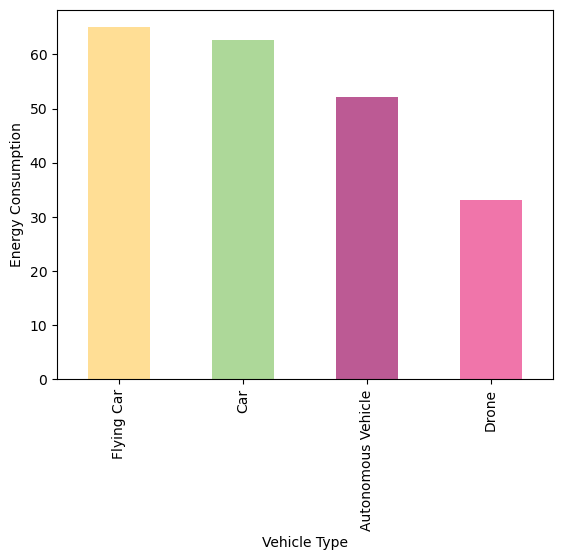

In [62]:
# make query dan define data_energy_vehicle
data_energy_vehicle = traffic.loc[traffic.Vehicle_Type != '0', ['Vehicle_Type', 'Energy_Consumption']].groupby('Vehicle_Type').mean().sort_values('Energy_Consumption', ascending=False).reset_index()

# visualize data
data_energy_vehicle.plot(kind='bar', x='Vehicle_Type', y='Energy_Consumption', xlabel='Vehicle Type', ylabel='Energy Consumption', color=color, legend=False)

**Conclusion:**

From the graph, it can be understood that flying cars use up the most energy, followed with car, autonomous vehicle, and drone.

### 5.6.D. Traffic Density
Using Spearman's method (Descriptive Statistics) to calculate correlation between Energy Consumption (numerical, normal) and Traffic Density (numerical, skewed).

rho-correlation: -0.03, p-value: 0.0006830028624387783


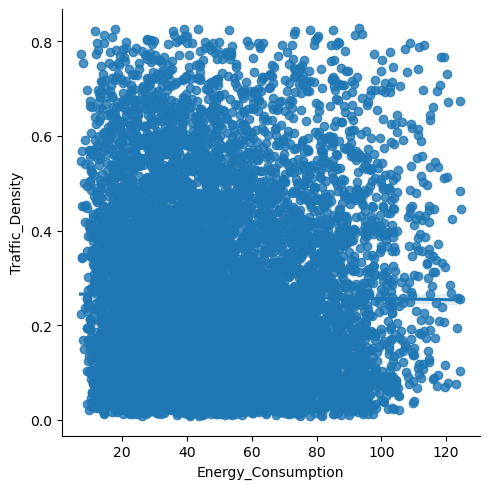

In [53]:
# visualize data
sns.lmplot(data=traffic,x='Energy_Consumption', y='Traffic_Density')

# calculate correlation
corr_rho, pval_s = stats.spearmanr(traffic['Energy_Consumption'], traffic['Traffic_Density'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

From the calculations, it can be understood that there is little correlation between Speed and Energy Consumption.

This is because the rho-correlation value is -0.03, whereas the correlation coefficient which indicates little correlation is 1 or -1, and the correlation coefficient which indicates that there is no correlation is 0. The calculation result of the rho-correlation value is near 0, so there is little correlation between the two variables.

The p-value result is 0.0006, less than 0.05, which is the limit to determine if the correlation is by chance or not. So, it is found that the correlation is not by chance.

**Conclusion:** 

There is little correlation between Energy Consumption and Energy Consumption, in which if Traffic Density is increased, the Energy Consumption will also increase.

## 5.7. Analyze Correlation Between Is Peak Hour with Hour Of Day, Energy Consumption, and Traffic Density

### 5.7.A. Hour of Day
Using Chi-Squared technique (Inferential Statistics) to calculate correlation between Is Peak Hour (categorical) with Hour of Day (categorical).

Defining hypotheses

H0: There is no correlation between Is Peak Hour and Hour of Day. *(null hypothesis)*

H1: There is a correlation between Is Peak Hour and Hour of Day. *(alternate hypothesis)*

In [54]:
#Contingency Table
contingency_table = pd.crosstab(traffic['Is_Peak_Hour'], traffic['Hour_of_Day'])
pd.set_option('display.max_columns', None)
contingency_table

Hour_of_Day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Is_Peak_Hour,,,,,,,,,,,,,,,,,,,,,,,,
0,420,408,382,386,400,425,389,115,124,399,417,427,259,278,272,399,400,140,106,412,435,427,411,426
1,0,0,0,0,0,0,0,285,272,0,0,0,102,133,140,0,0,281,268,0,0,0,0,0


In [55]:
# calculating p-value
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.0


Because the confidence level used is 95%, critical value: 0.05

0.0 < 0.05

p-value < critical value

**Conclusion:**

H0 is rejected. So, it can be understood that there is a correlation between Is Peak Hour and Hour of Day where hours 7, 8, 12, 13, 14, 17, and 18.

### 5.7.B. Energy Consumption
Using Kendall's technique (Descriptive Statistics) to calculate correlation between Is Peak Hour (categorical) with Energy Consumption (numerical).

tau-correlation: -0.02, p-value: 0.01156868406731508


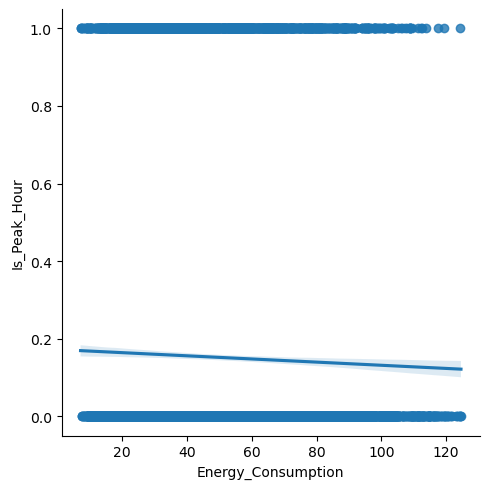

In [56]:
# visualize data
sns.lmplot(data=traffic,x='Energy_Consumption', y='Is_Peak_Hour')

# calculate with Kendall's technique
corr_tau, pval_k = stats.kendalltau(traffic['Energy_Consumption'], traffic['Is_Peak_Hour'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

From the calculations, it can be understood that there is little correlation between Is Peak Hour and Energy Consumption.

This is because the tau-correlation value is -0.02, whereas the correlation coefficient which indicates a correlation is 1 or -1, and the correlation coefficient which indicates that there is no correlation is 0. The calculation result of the tau-correlation value is near 0, so there is little correlation between the two variables.

The p-value result is 0.01, less than 0.05, which is the limit to determine if the correlation is by chance or not. So, it is found that the correlation is not by chance (significant).

**Conclusion:** 

There is little correlation between Is Peak Hour and Energy Consumption.

In [57]:
data_peakhour_energy = traffic.loc[traffic['Is_Peak_Hour']!=2, ['Is_Peak_Hour', 'Energy_Consumption']].groupby('Is_Peak_Hour').mean('Energy_Consumption')
data_peakhour_energy

,Energy_Consumption
Is_Peak_Hour,
0,49.209812
1,47.347635


From the table above, it can be understood that energy consumption rates during peak hours are lower than those outside peak hours.

### 5.7.C. Traffic Density
Using Kendall's technique (Descriptive Statistics) to calculate correlation between Is Peak Hour (categorical) with Traffic Density (numerical).

tau-correlation: 0.02, p-value: 0.016940022863168994


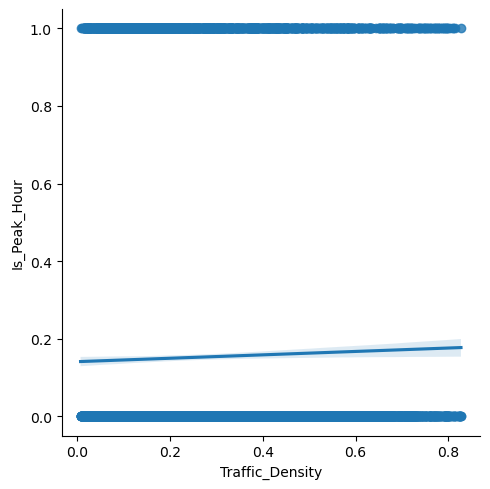

In [58]:
# visualize data
sns.lmplot(data=traffic,x='Traffic_Density', y='Is_Peak_Hour')

# calculate with Kendall's technique
corr_tau, pval_k = stats.kendalltau(traffic['Traffic_Density'], traffic['Is_Peak_Hour'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

From the calculations, it can be understood that there is little correlation between Is Peak Hour and Traffic Density.

This is because the tau-correlation value is 0.02, whereas the correlation coefficient which indicates a correlation is 1 or -1, and the correlation coefficient which indicates that there is no correlation is 0. The calculation result of the tau-correlation value is near 0, so there is little correlation between the two variables.

However, the p-value result is 0.01, less than 0.05, which is the limit to determine if the correlation is by chance or not. So, it is found that the correlation is not by chance (insignificant).

**Conclusion:** 

There is little correlation between Is Peak Hour and Traffic Density.

### 5.7.D. Speed
Using Kendall's technique (Descriptive Statistics) to calculate correlation between Is Peak Hour (categorical) with Speed (numerical).

tau-correlation: 0.02, p-value: 0.0035569276492468777


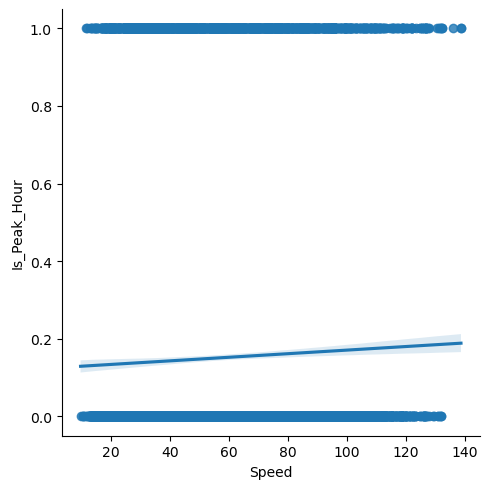

In [59]:
# visualize data
sns.lmplot(data=traffic,x='Speed', y='Is_Peak_Hour')

# calculate with Kendall's technique
corr_tau, pval_k = stats.kendalltau(traffic['Speed'], traffic['Is_Peak_Hour'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

From the calculations, it can be understood that there is little correlation between Is Peak Hour and Traffic Density.

This is because the tau-correlation value is 0.02, whereas the correlation coefficient which indicates a correlation is 1 or -1, and the correlation coefficient which indicates that there is no correlation is 0. The calculation result of the tau-correlation value is near 0, so there is little correlation between the two variables.

However, the p-value result is less than 0.05, which is the limit to determine if the correlation is by chance or not. So, it is found that the correlation is not by chance.

**Conclusion:** 

There is little correlation between Is Peak Hour and Speed.

In [60]:
data_peakhour_speed = traffic.loc[traffic['Is_Peak_Hour']!=2, ['Is_Peak_Hour', 'Speed']].groupby('Is_Peak_Hour').mean('Speed')
data_peakhour_speed

,Speed
Is_Peak_Hour,
0,59.274198
1,61.765081


From the table above, it can be understood that vehicle speed rates during peak hours are higher than those outside peak hours.

### 5.7.E. View Heatmap

<Axes: >

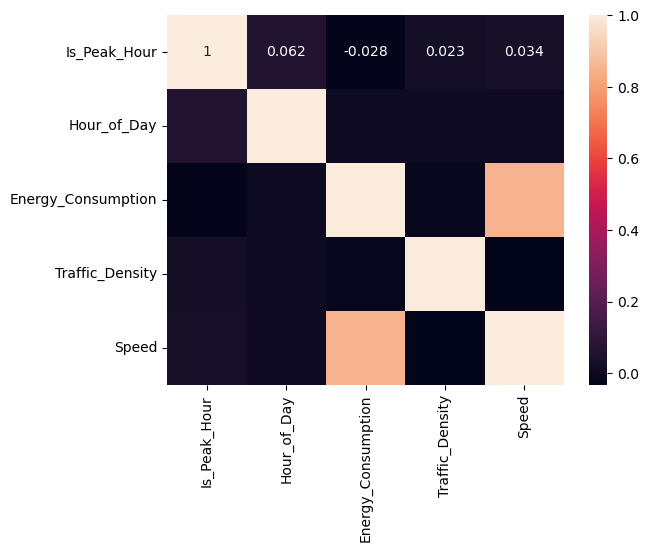

In [61]:
# make query dan define data_density_city
data_corr_peakhour = traffic.loc[traffic.Hour_of_Day != '0', ['Is_Peak_Hour', 'Hour_of_Day', 'Energy_Consumption', 'Traffic_Density', 'Speed']].reset_index(drop=True)

# visualize data
data_corr_peakhour.corr()
sns.heatmap(data_corr_peakhour.corr(),annot=True)

# 6. Conclusion

As a conclusion, from the processes that has been done, some insights regarding traffic in six cities has been retrieved. 

1. Choosing city as main focus
   - It was found that energy consumption is correlated to city. *MetropolisX* has the highest energy consumption rate, followed by SolarisVille, Neuroburg, TechHaven,  AquaCity, and Ecoopolis. So, it is advised for the company to focus more on cities with higher energy consumption rate.
   - It was found that energy consumption is correlated to speed. If the speed increases, the energy consumed also increases. The six cities have significantly different traffic density ranging between 55.1 to 64.7 starting with SolarisVille having the highest average rate followed by *MetropolisX*, Neuroburg, Ecoopolis, AquaCity, and TechHaven.
   - It was found that energy consumption is a little correlated to traffic density. If the traffic density increases, the energy consumed also increases. The six cities have significantly different traffic density ranging between 0.073 to 0.422 starting with AquaCity having the highest traffic density followed by *MetropolisX*, SolarisVille, TechHaven, Ecoopolis, and Neuroburg.
   - It was found that energy consumption is correlated to vehicle type. However, all six cities have similar distribution regarding vehicle type. This means that the company does not need to worry much about choosing a city to focus on regarding this aspect.

      **All in all, it can be concluded that it is best for the company to choose *MetropolisX* as the main focus.**

2. It was found that amongst the days of the week, energy is most consumed on Fridays, and amongst the hours in a day, energy is most consumed on 16.00. 

3. It was found that hours in day that is considered as peak hours are 07.00, 08.00, 12.00, 13.00, 14.00, 17.00, and 18.00.